---
title: "09-SAS 计量资料的单变量分析"
author: "Simon Zhou"
date: "2025-05-29"
date-modified: today
format: 
    html:
        code-fold: true
        fig_caption: true
        number-sections: true
        toc: true
        toc-depth: 2
---

In [1]:
%load_ext saspy.sas_magic

# 单变量分析

单变量分析是对单个变量进行统计分析的过程,用于单变量描述的 SAS 过程有很多,包括 `corr`、`freq`、`means`、`summary`、`tabulate` 和 `univariate` 等过程。

这些过程通常用于描述数据集的分布、中心趋势和变异性。

- `corr` 过程用于计算变量间的相关系数,还可以计算相关系数和一些单变量的描述性统计量。
- `freq` 过程可以生成单向和多向的频数表和交叉表。
- `means` 过程用于对数值变量计算简单描述性统计量。
- `summary` 过程也是用来计算单个变量的基本统计量。它和 `means` 过程不同之处在于,该过程不在 Output 窗口输出结果,除非加上命令 `print`,而 `means` 总是在 Output 窗口输出结果
- `tabulate` 过程是用分类报表的形式输出满足用户要求的描述性统计量。
- `univariate` 过程可以计算的描述性统计量是最多的,而且还可用图表的形式反映变量值的分布情况,并对变量进行正态性检验

这里主要介绍 `freq`、`means` 和 `univariate` 过程

## 频数表的编制

频数表是对分类变量进行单变量分析的常用方法,可以显示每个类别的频数和百分比。

1. 检查数据集，选择变量

In [3]:
%%SAS
/*check the dataset*/
proc print data = sashelp.cars(obs=5) label;
run;

观测,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,Engine Size (L),Cylinders,Horsepower,MPG (City),MPG (Highway),Weight (LBS),Wheelbase (IN),Length (IN)
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197


2. 使用 cars 数据集中的 MPG(City) 变量进行频数表的编制

In [ ]:
%%SAS
/*frequency table for MPG_City*/
proc freq data=sashelp.cars;
    tables MPG_City;;
run;

## 单变量描述

单变量描述是对数值变量进行统计分析的过程,可以计算均值、标准差、最小值、最大值等统计量。

### means 过程

In [11]:
%%SAS
/*simple descriptive statistics for MPG_City*/
proc means data = sashelp.cars;
    var MPG_City;
run;

`means` 过程默认给出均值、标准差、最小值和最大值，但是用户可以指定其他统计量，如下：

- `Stderr`:均数的标准差,即标准误;
- `Sum`:合计值;
- `Variance`:方差
- `CV`:变异系数;
- `Nmiss`:缺失变量值的观测例数;
- Range:极差;
- USS:平方和;
- CSS:离均差平方和;
- T:检验假设为总体均数为 0 的 *student-t* 检验的检验统计量 t 值;
- Probt:总体均数为0的检验假设中,值所对应的概率值(P值);
- Sumweight:权重变量值的和;
- Skewness:偏度系数;
- Kurtosis:峰度系数;
- CLM:双侧 95%置信区间的下限( lclm)和上限( uclm );
- Median P50:中位数或 50% 分位数;
- P1:1%分位数;
- P5:5%分位数;
- P10:10% 分位数;
- Q1|P25:下四分位数或 25%分位数;
- Q3|P75:上四分位数或 75% 分位数:
- P90:90%分位数;
- P95:95% 分位数:
- P99:99%分位数:
- Qrange:四分位数间距

多个统计量输出示例：

In [12]:
%%SAS
/*complex descriptive statistics for MPG_City*/
proc means data = sashelp.cars n mean std stderr cv clm Qrange;
    var MPG_City;
run;

### 保留小数

`means` 过程给出的结果中,每个统计量均在小数点后保留七位有效数字,可以通过 `maxdec` 语句改变有效位数,该语句是 `means` 过程的一个选
项,可加在 `proc means` 的后面。示例如下：

In [13]:
%%SAS
/*design the decimal*/
proc means maxdec = 2 data = sashelp.cars n mean std stderr cv clm;
    var MPG_City;
run;

### 频数表资料的描述性统计

如果数据已经被整理成频数表资料，`means` 过程通过 `freq` 语句定义频数变量,用 `var` 语句定义组中值变量,同样可以计算简单的描述性统计量。

In [15]:
%%SAS
/*程序4-4 freq*/
data prg4_4;
	input x f @@;
datalines;
3.17 2 3.37 3 3.57 9 3.77 22 4.17 30
4.37 21 4.57 15 4.77 10 4.97 6 5.17 4 5.37 2
;
run;
proc means;
	freq f;
	var x;
run;

## univariate 过程

`univariate` 过程能够给出的描述性统计量比较多,除了上述 `means` 过程给出的统计量外,它还能输出符号统计量、正态性检验的统计量以及用户自己定义的百分位数,而且可以生成若干个描述变量分布的茎叶图、箱式图、正态概率图等统计图。

In [ ]:
%%SAS
/*程序4-6 univariate过程*/
data prg4_6;
	input x f @@;
datalines;
18 4 30 17 42 32 54 24 66 18 78 12 90 5 102 4 114 2
;
run;
proc univariate;
	var x;
	freq f;
run;

**程序说明:**

- 数据集 `prg4_6` 中的变量为 `x` 和 `f` ;
- 调用 `univariate` 过程时,`var x;`语句指明 `x` 为分析变量;
- `freq f`,语句表示 `f` 为频数变量。

整个分析结果输出的统计量分为五个部分:

- 矩(Moments)、
- 基本统计测度( Basic Statistical Measures)、
- 位置检验( Tests for Location:Mu0=0)、
- 分位数[Quantiles(Definition 5)]
- 和极值观测(Extreme Observations )

1. `矩(Moments)` 部分的统计量包括:
- 非缺失值的例数(N)
- 权重总和(Sum Weights)
- 均数(Mean)
- 观测总和(Sum Observations)
- 标准差(Std Deviation)
- 方差(Variance)
- 偏度(Skewness,即偏度系数)
- 峰度(Kurtosis,即峰度系数)
- 未校正平方和(Uncorrected SS,即平方和)
- 校正平方和(Corrected SS,即离均差平方和)
- 变异系数(Coeff Variation)
- 标准误差均数(Std Error Mean,即标准误)。

2. `基本统计测度(Basic Statistical Measures)`部分统计量包括:
- 均数(Mean)
- 标准差(StdDeviation)
- 中位数(Median)
- 方差(Variance)
- 众数(Mode)
- 极差(Range)
- 四分位极差(Interquartile Range,即四分位数间距)。

3. `位置检验(Tests for Location: Mu0=0)`部分的统计量包括:

- Student's t: 总体均数为0的 student-t 检验的检验统计量u值;
- Pr > |t|: 总体均数为0的t检验中,检验统计量所对应的概率值(P值);
- Sign M: 总体中位数为0的符号检验的检验统计量 M值;
- Pr >= |M|: 总体中位数为0的符号检验中检验统计量所对应的概率值(P值);
- Signed Ranks: 总体中位数为0的符号秩检验的检验统计量S值;
- Pr >= |S|: 总体中位数为0的符号秩检验中，检验统计量所对应的概率值(P值)。

4. `分位数[Quantiles(Definition 5)]` 部分的统计量包括:
- 100% 分位数( 100% Max，即最大值)
- 99% 分位数
- 95% 分位数
- 90% 分位数
- 75% (即 Q3,上四分位数)
- 50% 分位数(即 Median,中位数)
- 25% 分位数(即 Q1,下四分位数)
- 10% 分位数
- 5% 分位数
- 1% 分位数和 0% 分位数( 0% Min,即最小值)。

5. `极值观测(Extreme Observations)` 部分列出了五个最小值和五个最大值以及这些值分别对应的频数和观测号。


`umivariate` 过程除了能够给出几个特定的百分位数,还能输出用户自己定义的百分位数。此时在过程中要使用 `output` 语句.

In [19]:
%%SAS
data prg4_6;
	input x f @@;
datalines;
18 4 30 17 42 32 54 24 66 18 78 12 90 5 102 4 114 2
;
run;
/*程序4-7 univariate 自定义百分数，需要使用 output 语句*/
/**/
proc univariate data = prg4_6;
	var x;
	freq f;
	output out = pct pctlpre = p pctlpts = 2.5 97.5;
run;
proc print data = pct;
run;

**程序说明：**

- `univariate` 产生的部分统计量输出到新建的数据集中,数据集的名称由 `out= ` 来定义,本例 `out=pct` 就是表示将要新建的数据集名称定为 `pct`。
- `output` 语句中的选项 `pctlpts` 表示需要计算的百分位数,本例需要输出第 2.5% 和第 97.5%分位数;
- `pctlpre` 表示在新数据集中的变量中百分位数的前缀,本例表示百分位数前缀为 `p`。

## 正态性检验

正态性检验是检验数据是否符合正态分布的统计方法,常用的正态性检验方法有 `Shapiro-Wilk` 检验、`Kolmogorov-Smirnov` 检验等。

在 SAS 中,可以使用 `univariate` 过程进行正态性检验，其语法只需要在 `proc univariate` 语句中加上 `normal` 选项即可，`normal` 和 `plot` 选项,就能输出该组数据正态性检验的结果和茎叶图、箱式图及正态概率图。


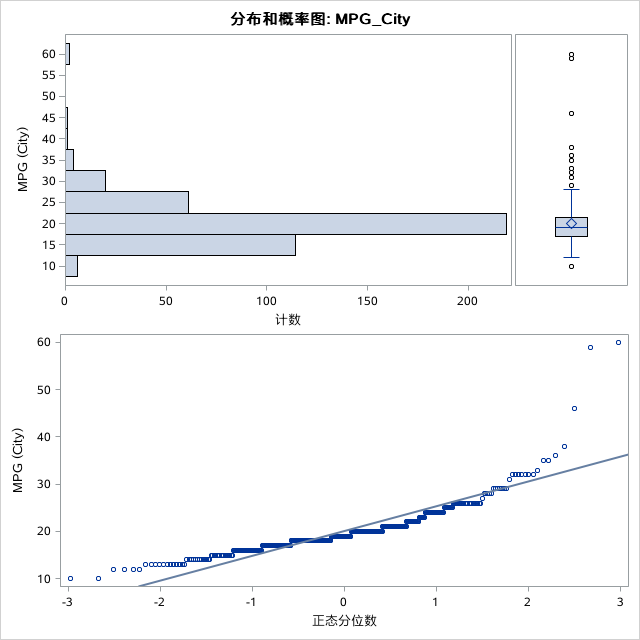

In [20]:
%%SAS
proc univariate normal plot data = sashelp.cars;
    var MPG_City;
run;

### 正态性检验部分"Tests for Normality"

正态性检验部分包括 `Shapiro-Wilk` 检验以及基于经验分布函数的拟合优度检验:`Kolmogorov-Smirnov` 检验、`Cramer-von Mises` 检验、
`Anderson-Darling` 检验。

**样本量**

- 当 `n≤2000` 时,选用 `Shapiro-Wilks` 检验的检验统计量;
- 当 `n>2000` 时则选用 `Kolmogorov-Smirnov` 检验的检验统计量。

**总体参数**
根据总体参数是否已知来选用不同的拟合优度检验及其对应的检验统计量

- 正态分布总体均数和标准差都已知或都未知时上述三种基于经验分布函数的拟合优度检验都可选用;
- 正态分布总体均数和标准差有一者未知时,选用 `Cramer-von Mises` 检验或 `Anderson-Darling` 检验。
 
本例由于样本例数仅为 428,所以选用 `Shapiro-Wilks` 检验统计量 W=0.80784 所对应的 `P= < 0.001`,说明该资料不服从正态分布。

## 几何均数的计算